In [64]:
import pygrib
import cartopy.crs as ccrs
from matplotlib import pyplot as plt 
import cartopy.feature as cfeature
%matplotlib inline

For definition of the file name, see the following URL: https://www.nco.ncep.noaa.gov/pmb/products/hrrr/

In [63]:
grbs = pygrib.open('hrrr.20141029-conus-hrrr.t00z.wrfnatf13.grib2')
grb = grbs.select(name='Vertically-integrated liquid')[0]
# the grb will have latlons field, which is, one guesses, latitude and longitude
# so be sure to use PlateCarée for these numbers (see the code block below)

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


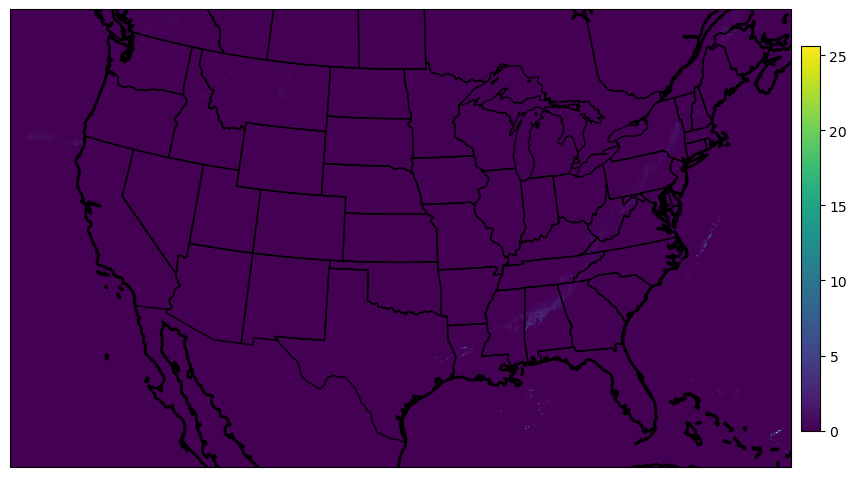

In [76]:
projection = ccrs.LambertConformal(
    central_longitude = -97.5,
    central_latitude = 38.5,
    standard_parallels = (38.5,38.5),
    cutoff = 0) # this is the projection that is used to draw the map. For contiguous United States, use LambertConformal
grb_lat = grb.latlons()[0]
grb_lon = grb.latlons()[1]
grb_val = grb.values
fig = plt.figure(figsize=[12, 10])
ax = plt.axes(projection=projection)
D = ax.pcolormesh(grb_lon, grb_lat, grb_val, transform=ccrs.PlateCarree(), shading='nearest')
fig.colorbar(D, ax=ax, shrink=.5, pad=.01)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=2)
ax.add_feature(cfeature.STATES.with_scale('50m'))